In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
plt.rcParams['font.family']='malgun gothic'

import warnings
warnings.filterwarnings('ignore') # 경고메시지 숨기기
#warnings.filterwarnings('default') # 경고메시지 보이게 

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 과정
## Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

## Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

## Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction.

## 1. EDA

In [2]:
data = pd.read_csv('./dataset/dietanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

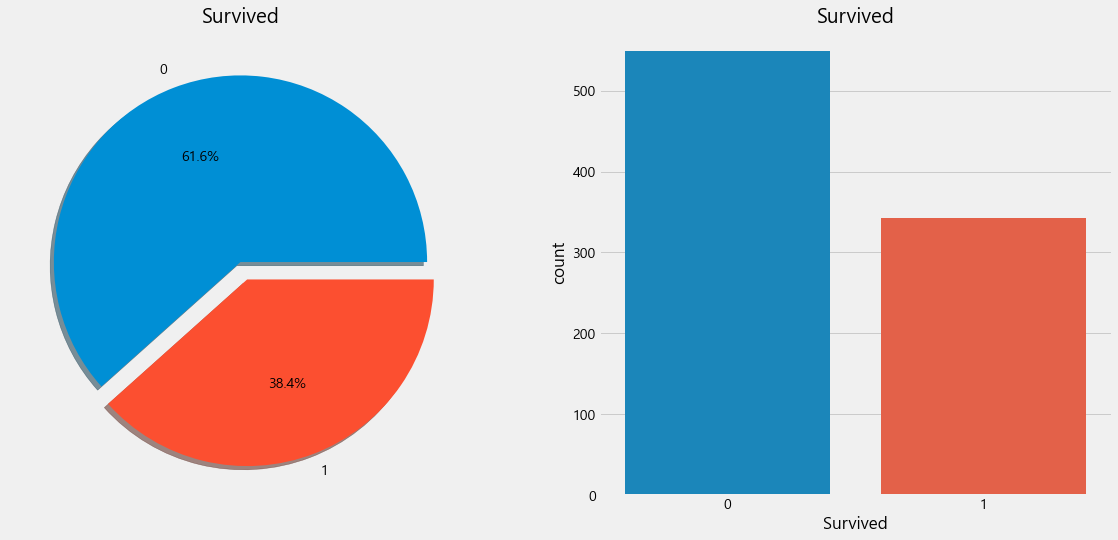

In [5]:
# 얼마나 생존했나
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data= data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- 891승객중 350정도가 생존, 38.4%가 생존했다

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

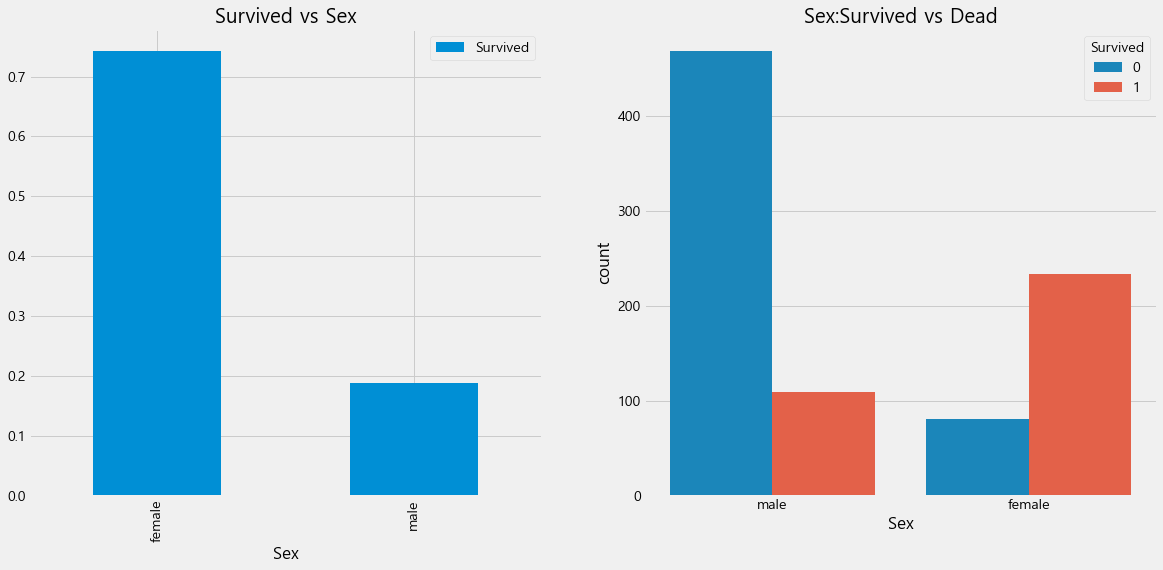

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived', data = data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 여성은 70퍼센트 이상 생존, 남성은 약 20대를 웃돈다
- 여성의 생존 비율이 더 높음

In [8]:
pd.crosstab(data.Pclass,data.Survived, margins=True).style.background_gradient(cmap=
                                                                              'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


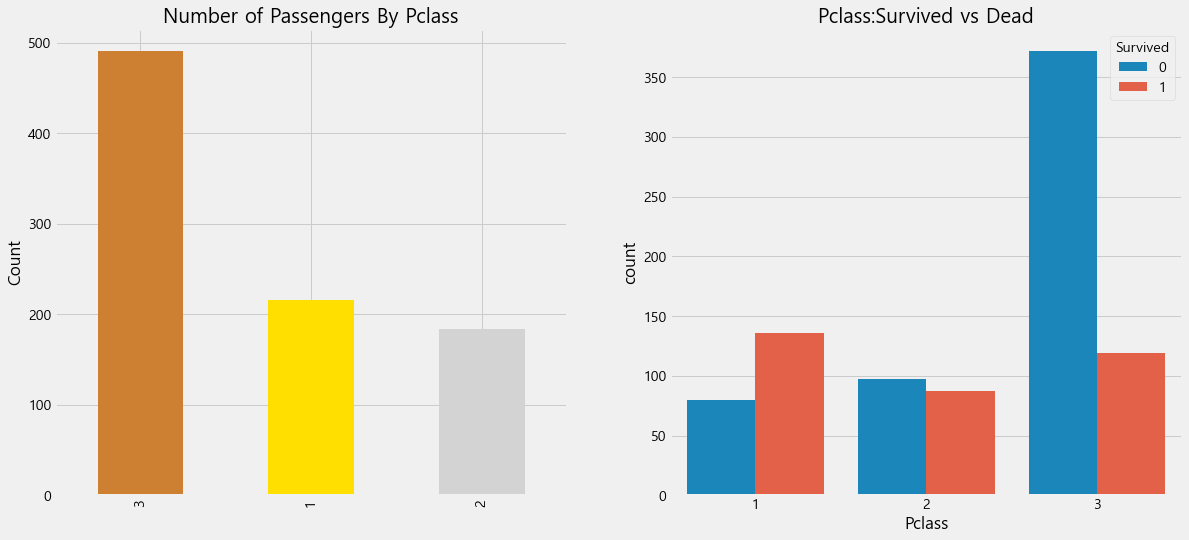

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 남성의 경우 3인실 생존율이 가장낮고, 여성의경우 1등급실 생존율이 가장높음
- 1등급 객실 생존률이 63%, 2등급이 48

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

- 여성 1등급 생존인원 91, 남성 45
- 여성 2등급 생존인원 70, 남성 17
- 여성 3등급 생존인원 72, 남성 47

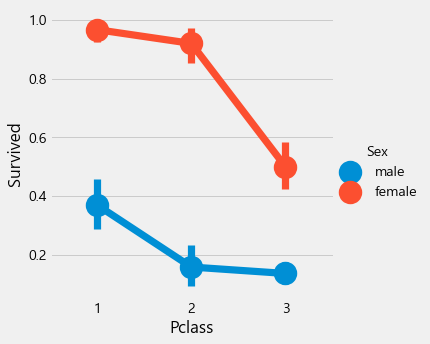

In [11]:
sns.catplot(y='Survived',x='Pclass',kind='point',hue='Sex',data=data)
plt.show()

- 1등석 여성이 95~96퍼센트 생존율을 보인다

In [12]:
print('Oldest passenger was of:',data['Age'].max(),'Years')
print('Youngest passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest passenger was of: 80.0 Years
Youngest passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


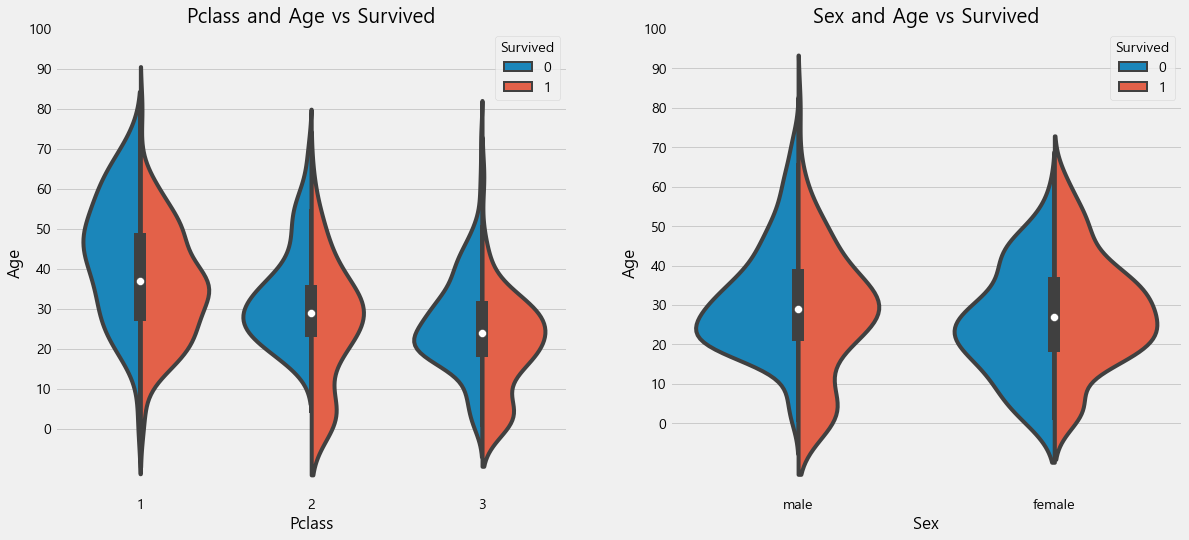

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data =data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 생존자중 1등석이 생존자 분포가 더 넓다 -> 더 많은 연령층의 사람들이 생존
- 3등석이 1등석에 비해 생존자 분포가 몰려있음, 사망자 분포도 비슷함

In [14]:
#이름에서 이니셜 추출
data['Initial']=0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #정규표현식사용

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer',
                        'Col','Rev','Capt','Sir','Don'],
                       ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
                        'Other','Mr','Mr','Mr'],inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## NaN 채우기

In [18]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [19]:
data.Age.isnull().any() #null값 남았는지 체크

False

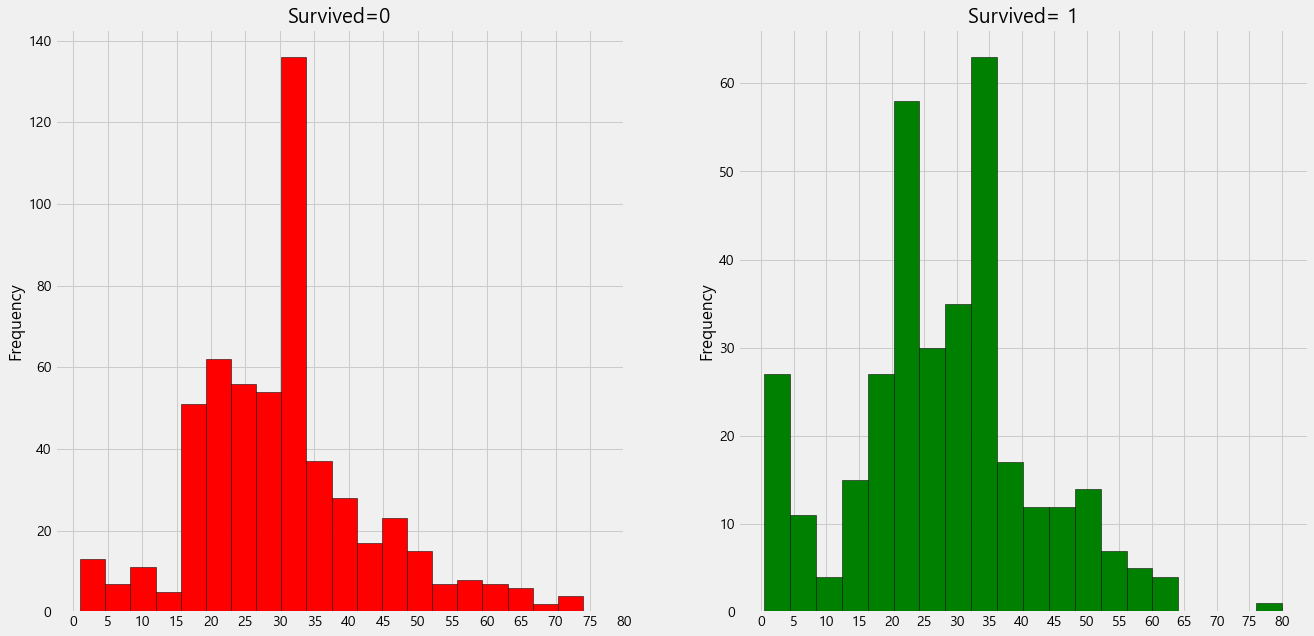

In [20]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

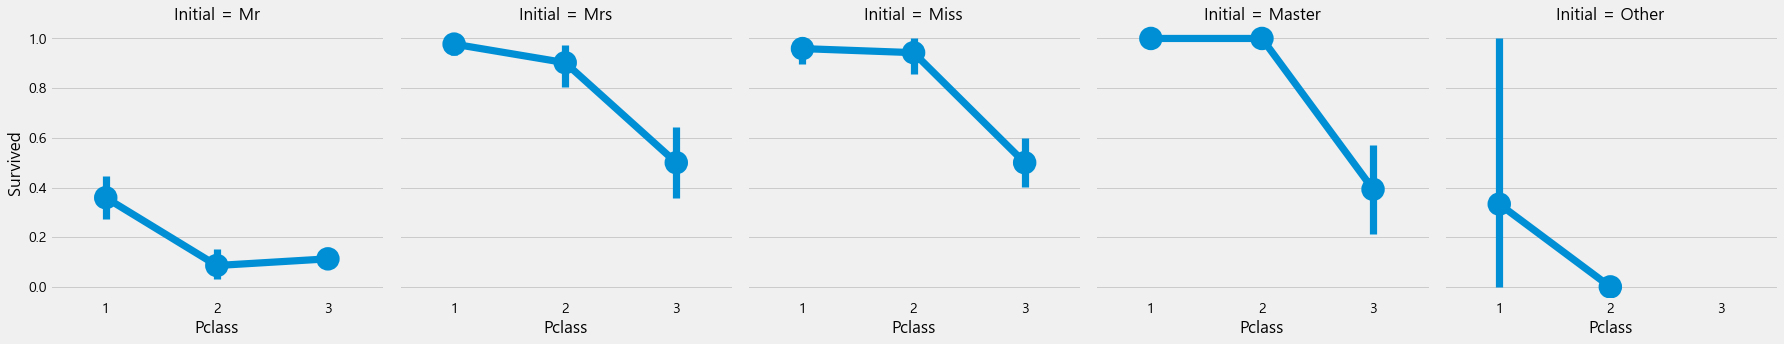

In [21]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')
plt.show()

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

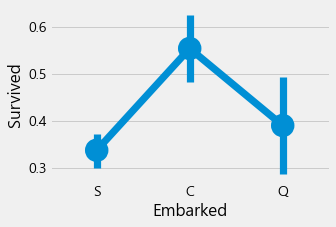

In [23]:
# chance for survival by port of embarkation
sns.catplot(x='Embarked',y='Survived', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- port C가 0.55로 가장 높게 생존, port s가 가장 낮다

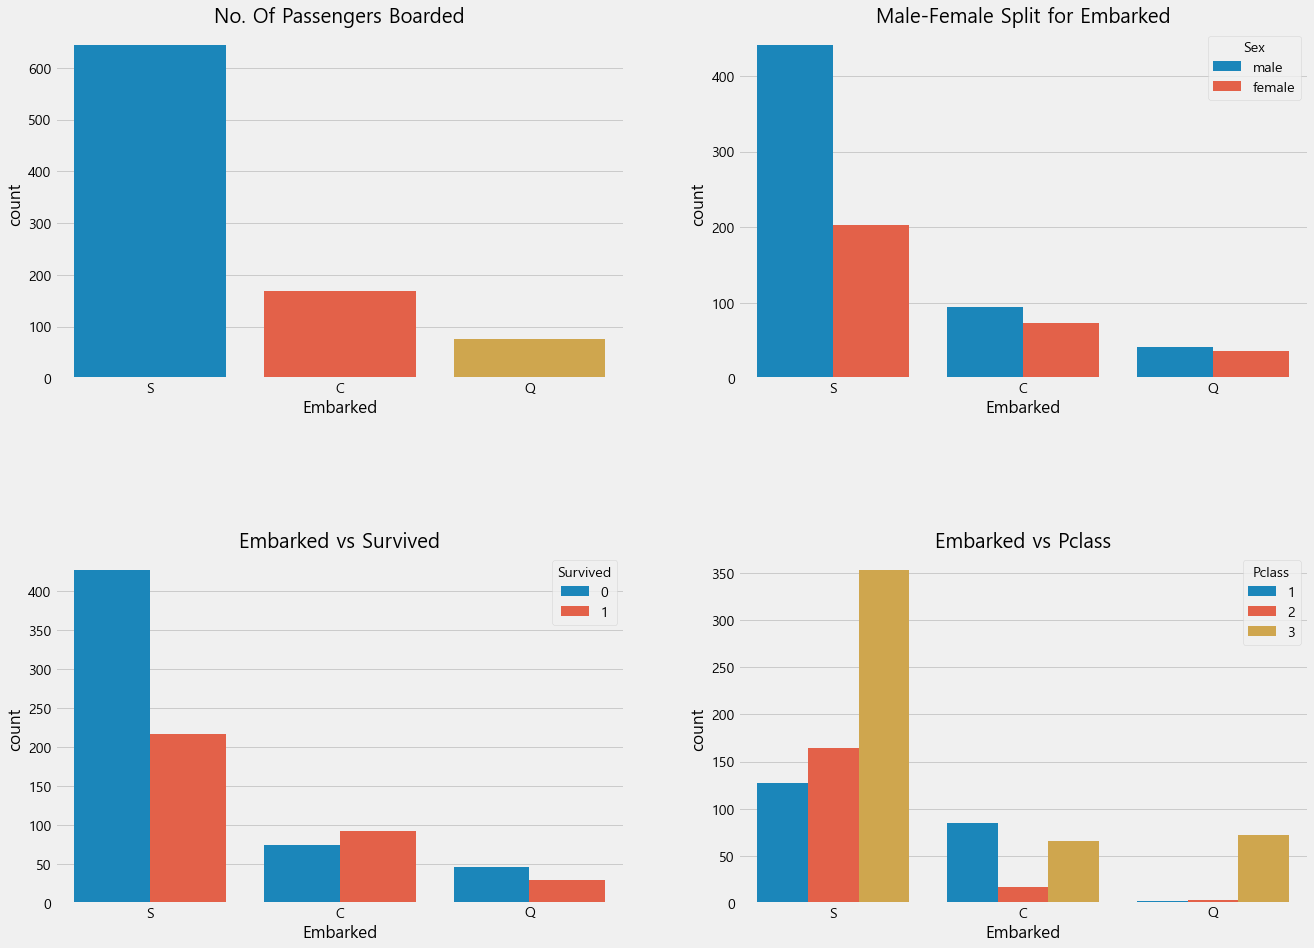

In [24]:
f, ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

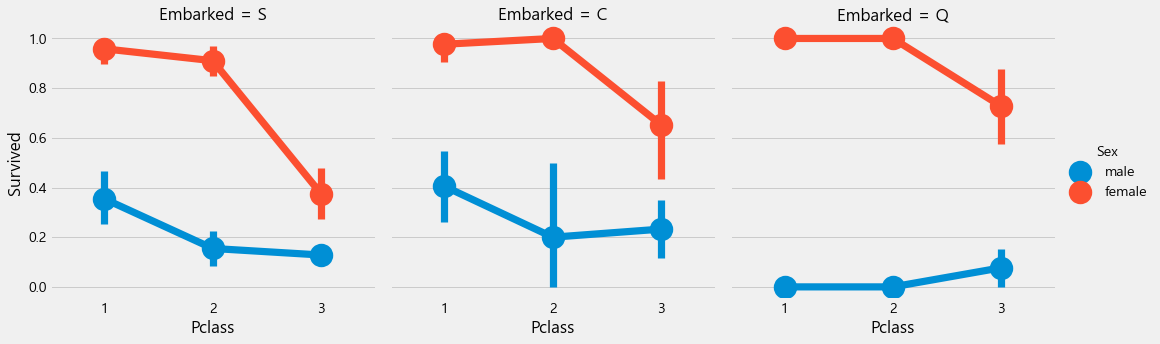

In [25]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

In [26]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any() # finally no nan values

False

## Sibsip -> discrete feature
- sibling = brother, sister, stepbrother ,stepsister
- spouse = husband, wife

In [27]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


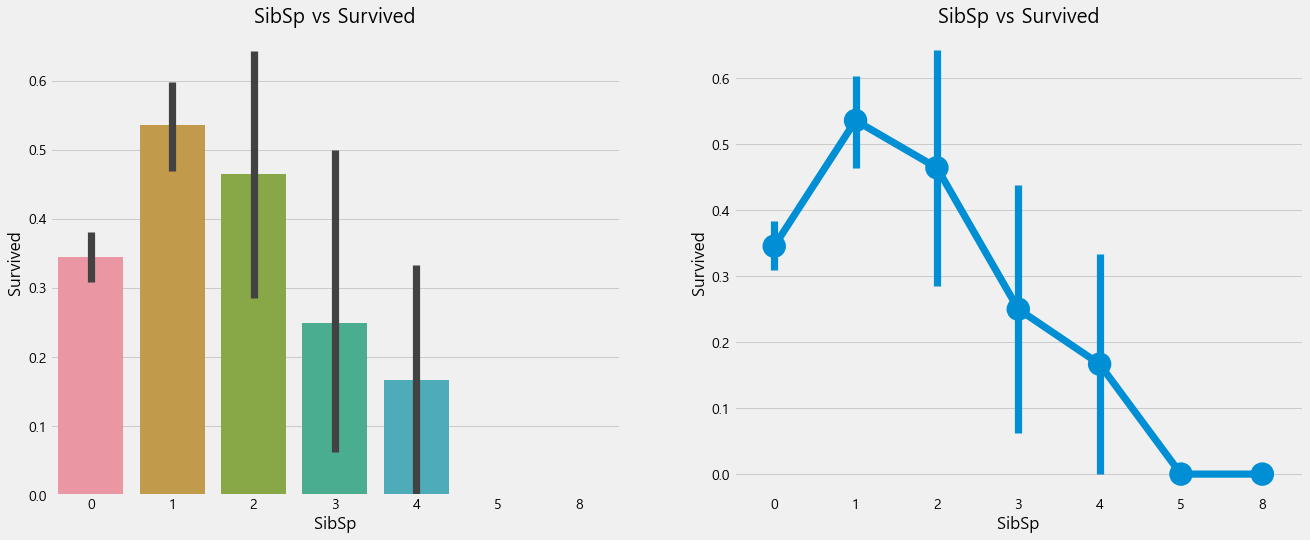

In [28]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data = data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp',y='Survived',data=data, ax=ax[1]) 
# catplot에 kind='point'옵션 대신 pointplot써도됨
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [29]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [30]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


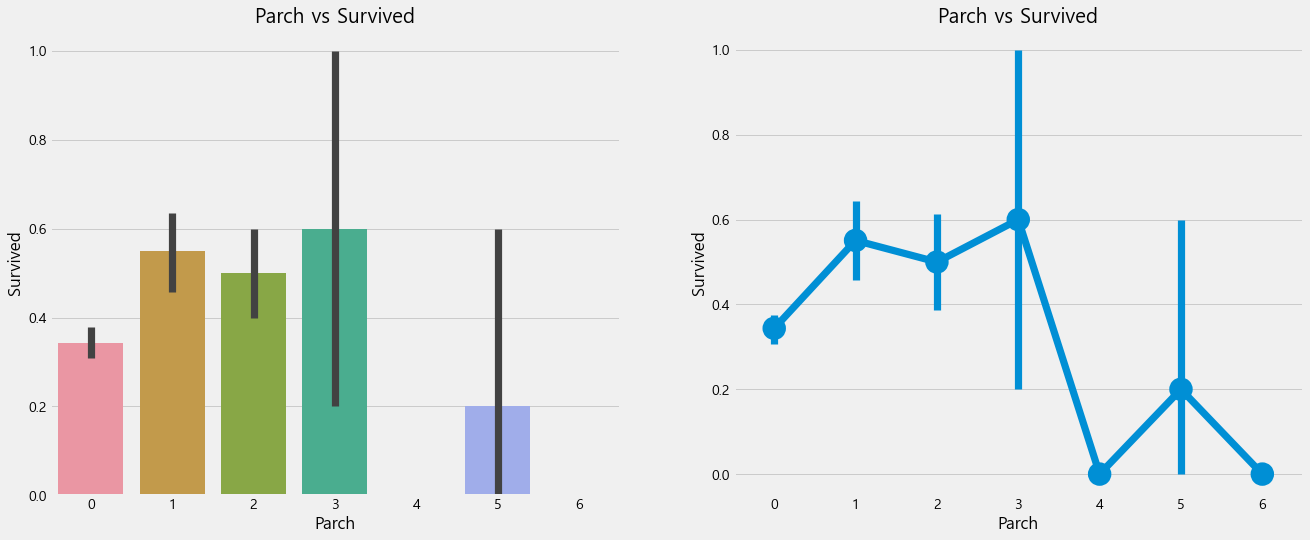

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

## Fare -> Continous Feature

In [32]:
print('Hightest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Hightest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


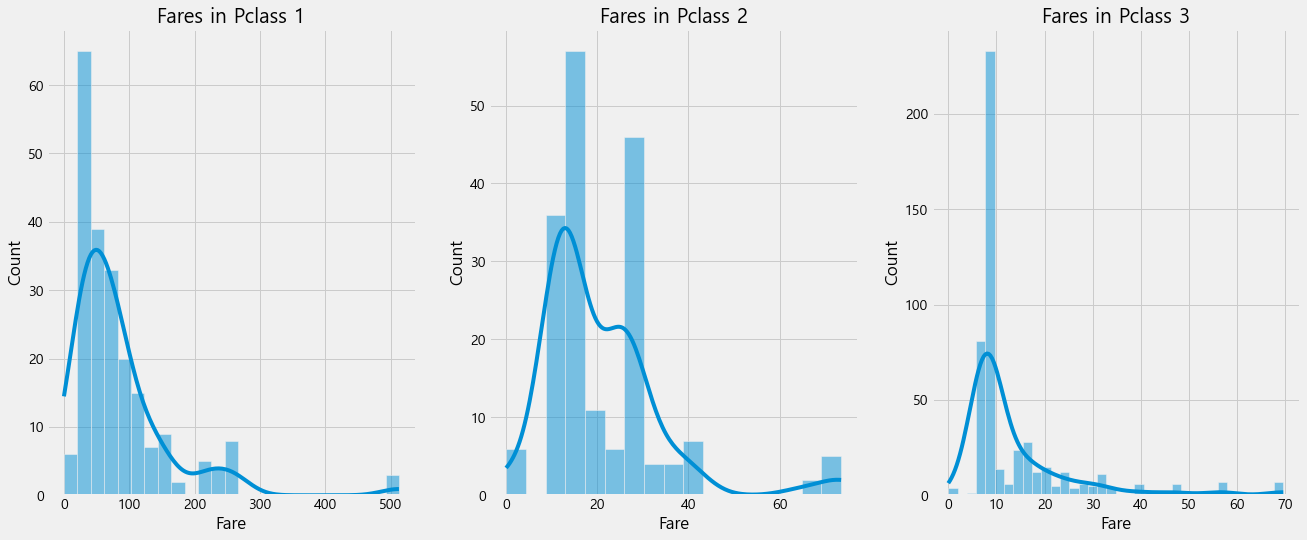

In [33]:
# distplot대신 histplot
f, ax =plt.subplots(1,3,figsize=(20,8))
sns.histplot(data[data['Pclass']==1].Fare,ax=ax[0],kde=True)
ax[0].set_title('Fares in Pclass 1')
sns.histplot(data[data['Pclass']==2].Fare, ax=ax[1],kde=True)
ax[1].set_title('Fares in Pclass 2')
sns.histplot(data[data['Pclass']==3].Fare, ax=ax[2],kde=True)
ax[2].set_title('Fares in Pclass 3')
plt.show()

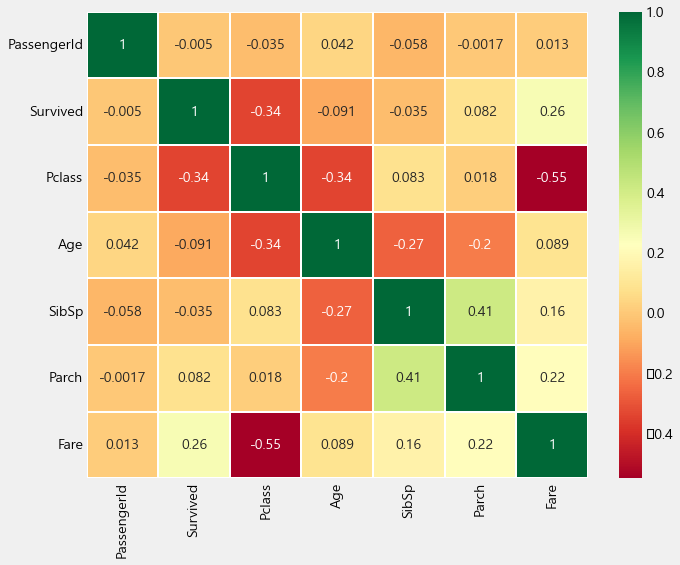

In [34]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- 양의 상관관계: 
- 음의 상관관계: survivied가 증가할때 pclass는줄어듦
- 가장큰 상관관계: SibSp and Parch

## Feature Engineering and Data Cleaning

In [35]:
## Age band
data['Age_band'] = 0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [36]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


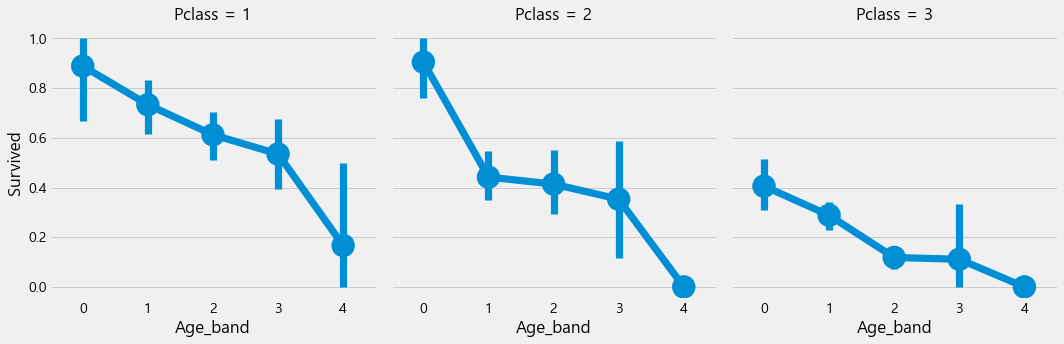

In [37]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

## Family Size and Alone

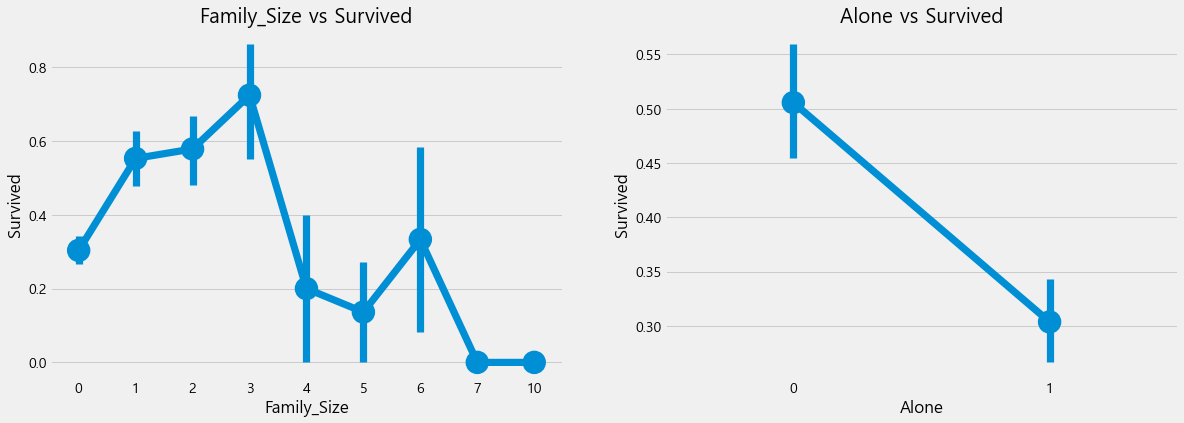

In [38]:
data['Family_Size']=0
data['Family_Size']= data['Parch']+data['SibSp'] #family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1 # Alone

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

- Family_Size =0 인 승객은 혼자 탑승함
- family_size가 0 인 경우, 다른 생존자들과 비교해서 생존율이 매우 낮다
- 가족 3명까지는 생존률이 커진다, 그러나 4명 이상부터는 생존율이 떨어진다

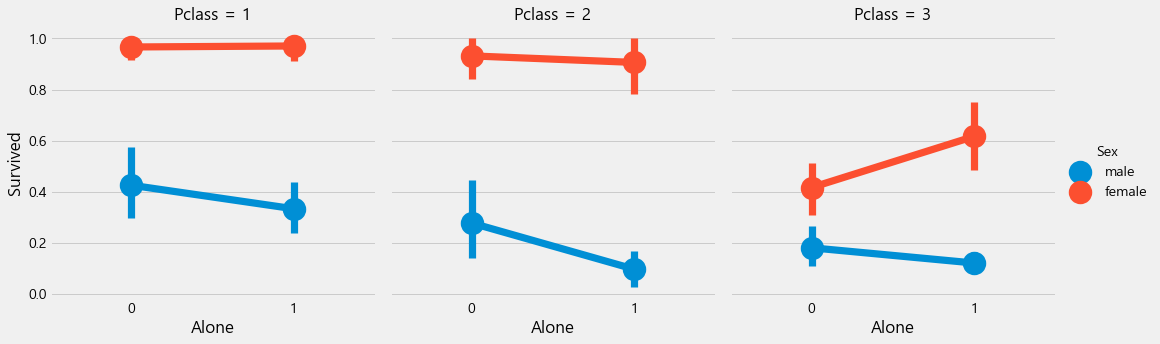

In [39]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

## Fare Range
- pandas.qcut. 사용
- 이산화를 위해 구간별 나누기

In [40]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- 요금이 높아질수록 생존 비율이 늘어난다

In [41]:
data['Fare_cat']=0
data.loc[data['Fare']<= 7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

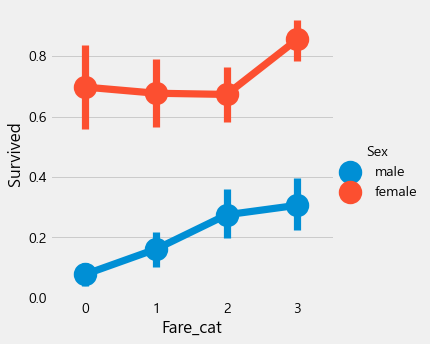

In [42]:
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex',kind='point')

## Converting String values into numeric

In [43]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],
                       [0,1,2,3,4],inplace=True)

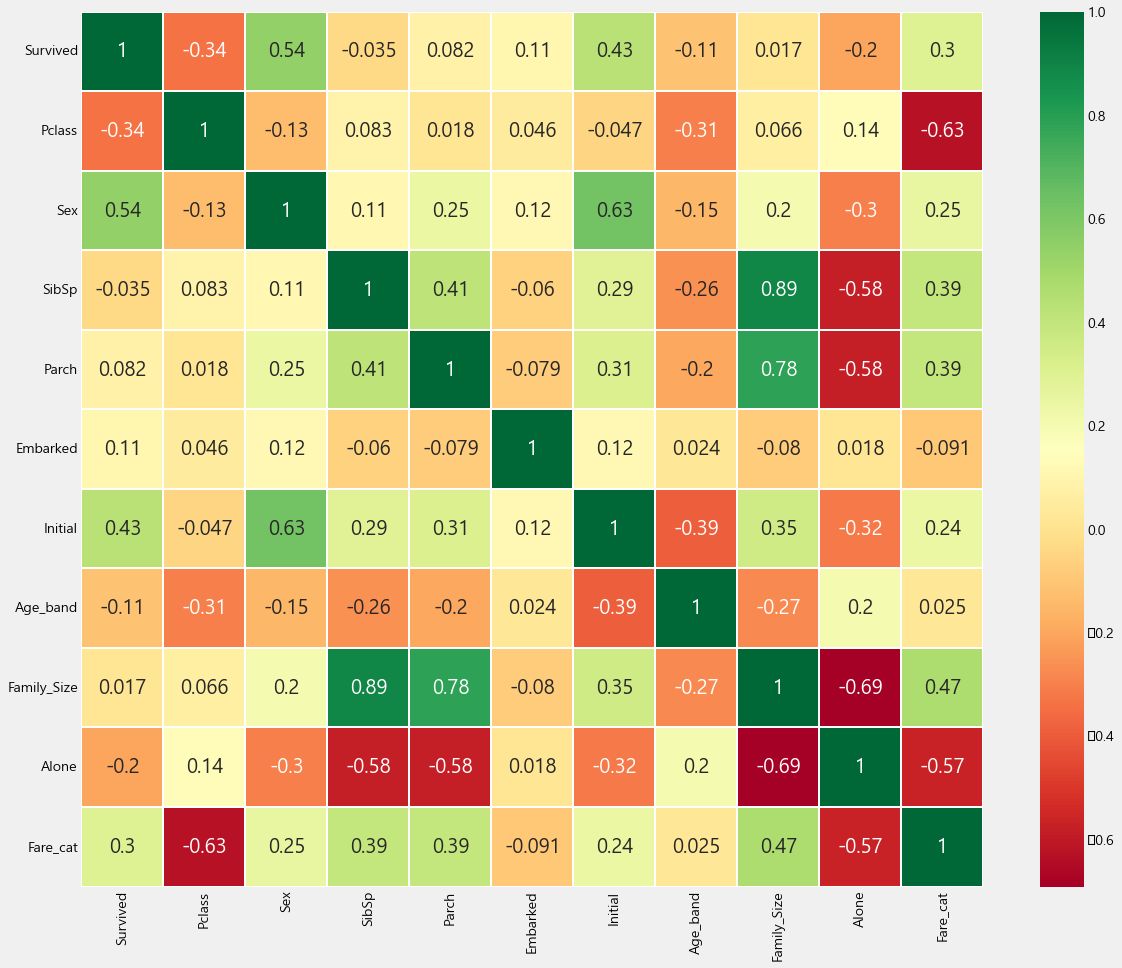

In [44]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,
           annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- SibSp, FamilySize 연관성이 크다
- parch, familysize 연관성이 큼
- alone이랑 familysize 음의 상관관계

## predictive modeling
1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression #logisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #confusion matrix

In [46]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
# stratify : y 데이터 옵션임
train_X = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_y = test[test.columns[:1]]
X = data[data.columns[1:]]  
Y = data['Survived']

## Radial Support Vector Machines(rbf-SVM)

In [47]:
model = svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_y))

Accuracy for rbf SVM is  0.835820895522388


## Linear Support Vector Machine(linear-SVM)

In [48]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X,train_y)
prediction2= model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_y))

Accuracy for linear SVM is 0.8171641791044776


## Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3,test_y))

The accuracy of the Logistic Regression is 0.8134328358208955


## Deicision Tree

In [50]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_y))

The accuracy of the Decision Tree is 0.8059701492537313


## K-Nearest Neighbours(KNN)

In [51]:
model = KNeighborsClassifier()
model.fit(train_X,train_y)
prediction5  = model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5, test_y))

The accuracy of the KNN is 0.8134328358208955


knn default value는 5인데 값에 변화를 주면서 확인해보자

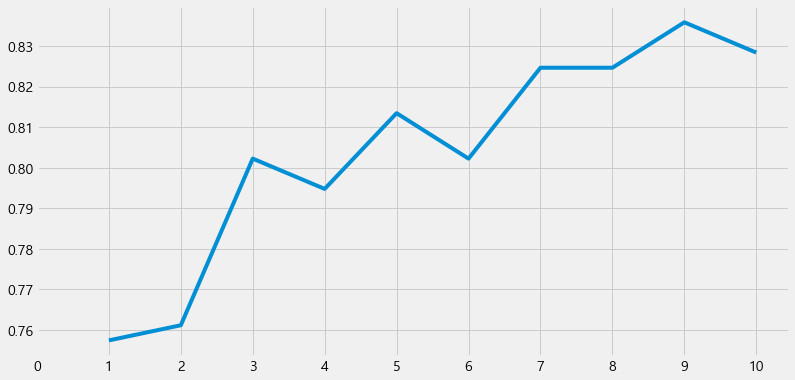

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [52]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y.values.ravel())
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ', a.values.max())

## Gaussian Naive Bayes

In [53]:
model = GaussianNB()
model.fit(train_X,train_y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ',metrics.accuracy_score(prediction6,test_y))

The accuracy of the NaiveBayes is  0.8134328358208955


## RandomForests

In [54]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction7 = model.predict(test_X)
print('The accuracy of the RandomForests is ',metrics.accuracy_score(prediction7,test_y))

The accuracy of the RandomForests is  0.8022388059701493


- 모델 정확도만이 분류기의 성능을 결정짓는 요인이 아님!
- 분류기가 테스트 데이터를 90퍼센트 이상 정확도를 가진다고 가정할때, 매우 좋은 정확도인것처럼 보이지만 새로운 테스트 데이터가 들어왔을 때 분류를 90%이상 해낸다고 확인할 수 없다
- 따라서, train이랑 test데이터가 변경됨에 따라 정확도도 증가하거나 감소한다
> model variance 라고 함

- 해결하기 위해 일반화된 모델로 교차검증(cross validation)을 해야한다 

## Cross Validation

- 대부분의 경우에 모델 데이터가 불균형하다. 클래스별로 불균형하기도 함
- 그래서 train test 데이터셋을 잘 만들고 잘 훈련시켜야 함! 그러면 전반적인 accuracy도 높아질것

1) K-Fold Cross Validation은 먼저 데이터 세트를 k-subsets 으로 나누는 방식으로 작동한다.
2) dataset을 (k=5) 부분으로 나눈다고 가정. 테스트를 위해 1개의 파트를 테스트 용으로 사용하고 나머지 4개의 파트에 걸쳐 알고리즘을 훈련시킨다.
3) 변경된 테스트 부분을 반복해서 학습시킨다. accuracy와 error는 알고리즘의 평균 accuracy를 얻기 위해 평균화된다.
> 이를 K-Fold 교차 검증이라고 합니다.

4) 알고리즘은 일부 훈련 데이터에 대한 데이터 세트에 비해 적합하지 않을 수 있으며 때로는 다른 훈련 세트에 대해 데이터를 지나치게 적합시킬 수도 있다. 따라서 교차 검증을 통해 일반화된 모델을 달성할 수 있다.

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, 전체 데이터셋을 같은 크기로 10등분한다
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radical Svm','Logistic Regression','KNN','Decision Tree',
             'Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
       KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),GaussianNB(),
       RandomForestClassifier(n_estimators=100)]

for i in models:
    model =i
    cv_result = cross_val_score(model, X, Y, cv=kfold,scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'std':std},index=classifiers)
new_models_dataframe2

,CV Mean,std
Linear Svm,0.784607,0.057841
Radical Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.810387,0.041506
Decision Tree,0.806991,0.044150
Naive Bayes,0.795843,0.054861
Random Forest,0.810375,0.043377


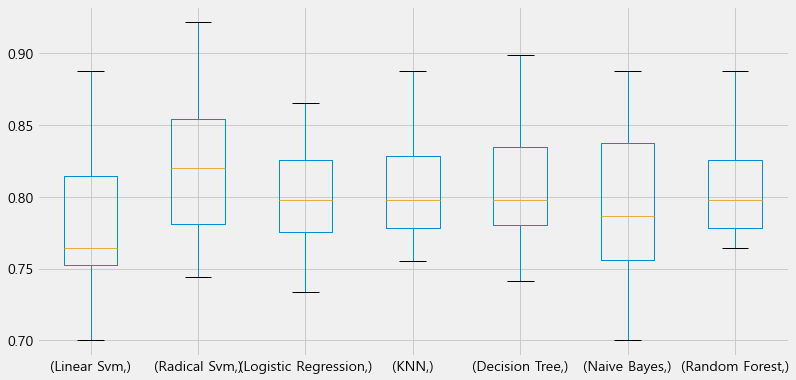

In [56]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()
plt.show()

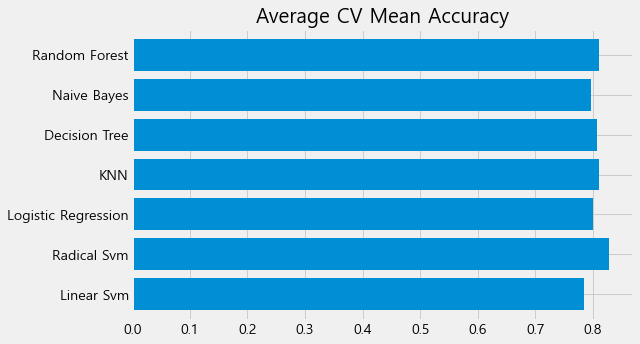

In [57]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

classification accuracy는 가끔 불균형으로 인해 오차 발생이 가능하다,
그래서 confusion matrix를 통해 어떤 모델이 틀렸는지, 어떤 클래스의 모델 예측이 잘못되었는지 확인가능하다

## Confusion Matrix

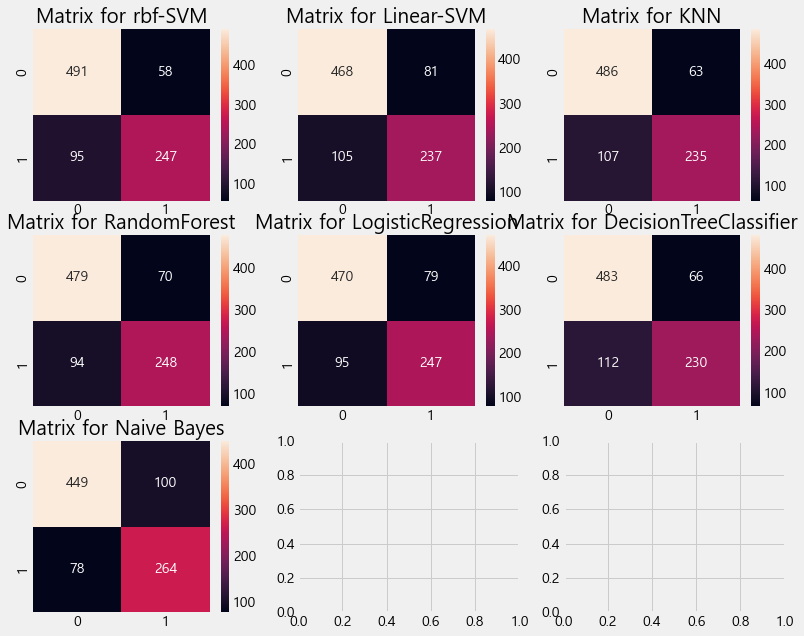

In [58]:
f, ax = plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for RandomForest')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for LogisticRegression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for DecisionTreeClassifier')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## Interpreting Confusion Matrix

[rbf-SVM]
- 정확한 predictions are 491(for dead) + 247(for survived) 
- 평균mean CV accuracy: (491+247)/891 = 82.8% 


- 오류: 58명의 사망자를 생존자로 잘못 분류했다. 죽은 사람을 생존자로 예측함
- rbf-SVM이 사망한 승객을 정확하게 예측할 가능성이 더 높지만, 나이브 베이즈는 생존한 승객을 정확하게 더 예측할 가능성이 높다

## Hyper parameter Tuning
- 머신러닝 모델은 블랙박스와 같다. 기본 변수들이 블랙박스를 통과해서 더 좋은 모델로 나온다
- SVM모델의 C나 gamma와 같은 변수들을 hyper-parameter라고 하고 이 하이퍼파라미터들을  조정해서 더나은 모델을 만드는 것을 hyperparameter tuning 이라고함 
> 가장 성능이 좋은 2가지 분류기인 SVM과 RF을 대상으로 hyper parameter를 튜닝한다

## SVM

In [59]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


## RandomForest

In [60]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid = hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling
- ensembling은 accuracy (모델 정확도)를 증가시키는 방법
- 다양한 모델을 결합해서 하나의 강력한 모델로 만든다
- improves the stability of the model = 모델의 안정성을 향상

1)Voting Classifier

2)Bagging

3)Boosting

## Voting Classifier
- 가장 간단한 방법: 다양한 모델의 prediction을 결합한다
- 평균 prediction이 각 submodel들을 통해 추출된다
- 각각의 submodels 이나 basemodels은 다른 성질을 지니고 있음

In [62]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF',svm.SVC(probability=True, kernel='rbf',C=0.5, gamma=0.1)),
                                               ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                               ('LR',LogisticRegression(C=0.05)),
                                               ('DT',DecisionTreeClassifier(random_state=0)),
                                               ('NB',GaussianNB()),
                                               ('svm',svm.SVC(kernel='linear',probability=True))],
                                   voting='soft').fit(train_X,train_y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_y))
cross= cross_val_score(ensemble_lin_rbf, X,Y,cv=10, scoring='accuracy')
print('The cross validated score is:',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is: 0.8226716604244693


## Bagging
- 일반적인 앙상블 방법
- 비슷한 분류기를 추가해서 평균예측냄(?)
- 보팅과 다르게 배깅은 비슷한 분류기를 사용함

## Bagged KNN
- 배깅은 높은 모델이 큰 분산을 가지고 있을 때 잘 동작한다
- decision tree나 randomforest 같은..
- 여기선 KNN을 n_neighbours와 같이 사용

In [68]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator= KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


## Bagged DecisionTree

In [70]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0, n_estimators=100)
model.fit(train_X, train_y)
prediction= model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## Boosting

- 분류기를 순차적으로 학습시킴
- 단계를 밟아가며 약한 모델을 향상시킨다
- 처음에는 완전한 데이터셋을 학습시킴, 그다음 iteration에서는 더 틀린 예측으로 가중치를 부여해서 학습시킴(?)
- 그래서 틀린 예측을 올바르게 바로잡음
- 반복적인 학습이 무한대로 반복
- 정확도가 향상될때까지..

## AdaBoost(Adaptive Boosting)
- 약한 learner혹은 estimator (지금 상황에선 결정트리)
- 그러나 여기서는 default base_estimator가 되는 알고리즘을 선택가능?? 

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Adaboost is:',result.mean())

The cross validated score for Adaboost is: 0.8249188514357055


## Stochastic Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
grad =GradientBoostingClassifier(n_estimators=500, random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10, scoring='accuracy')
print('The corss validated score for Gradient Boosting is:',result.mean())

The corss validated score for Gradient Boosting is: 0.8115230961298376


## XGBoost

In [79]:
pip install xgboost

  Using cached xgboost-1.7.2-py3-none-win_amd64.whl (89.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [81]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate=0.1)
result = cross_val_score(xgboost, X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


- adaboost가 가장 좋은 성능을 보임

## Hyper Parameter Tuning for Adaboost

In [84]:
n_estimators = list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid = hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


- 가장 큰 정확도 accuracy는 adaboost를 통해 얻은 결과로 82.93% 이다
- n_estimator=100  learning_rate =0.1 일때이다

## Confusion Matrix for the Best Model

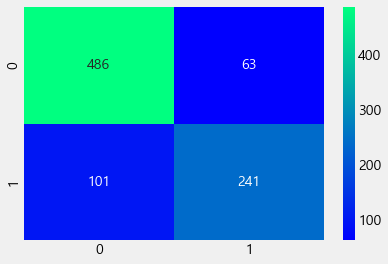

In [86]:
ada = AdaBoostClassifier(n_estimators = 100, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

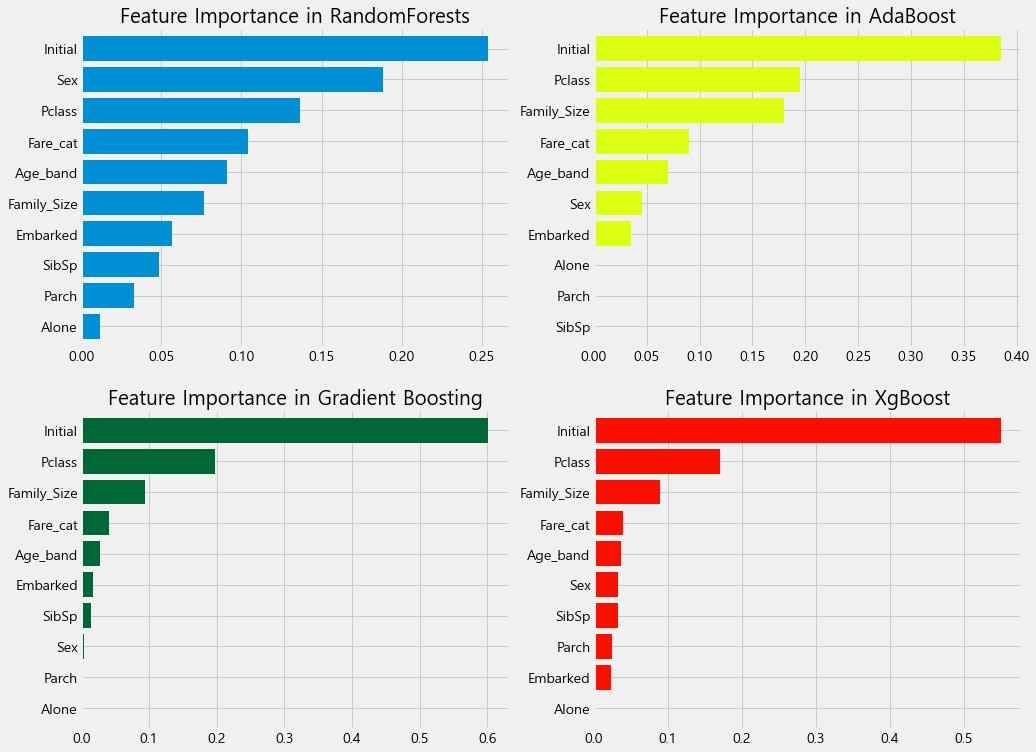

In [90]:
f, ax = plt.subplots(2,2,figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in RandomForests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

## 관측치:
1)일반적으로 중요한 기능 중 일부는 Initial, Fare_cat, Pclass, Family_Size입니다.

2)Sex 변수는 중요성을 부여하지 않는 것으로 보이는데, 앞서 Sex와 Pclass가 결합된 것이 매우 좋은 차별화 요소를 보여줬었다. 랜덤포레스트에서에서만 성별 변수가 중요해 보인다.

많은 분류기의 상위권에서 Initial 변수를 볼 수 있다. 이미 Sex와 Iitial의 양의 상관곤계를 봤다. 둘 다 성별을 관련된 변수이다.

3)Pclass와 Fare_cat은 승객의 정보를 보여주고, Family_Size와 Alone, Parch, SibSp 변수도 승객의 정보를 나타낸다